This is a classification type of Problem. So, here we are going to try two one of the best algorithms for classification
i.e. <br> 1) Random forest classifier <br> 2) Decision tree classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

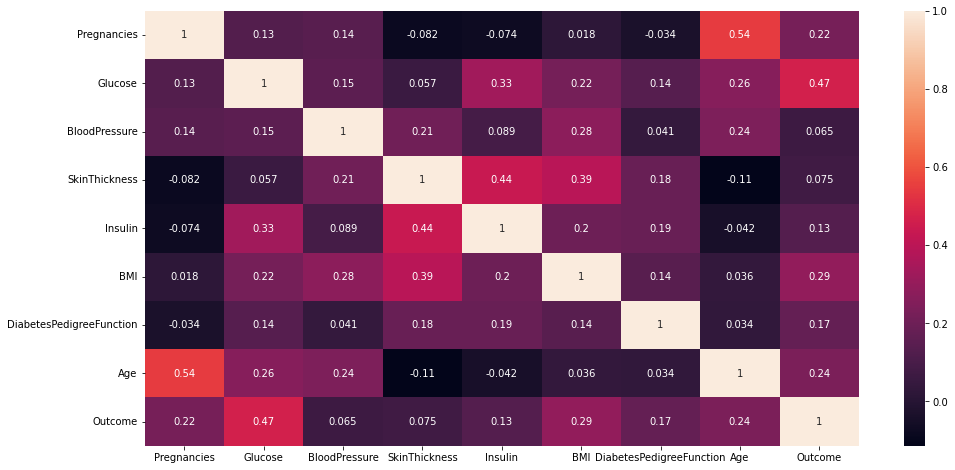

In [5]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

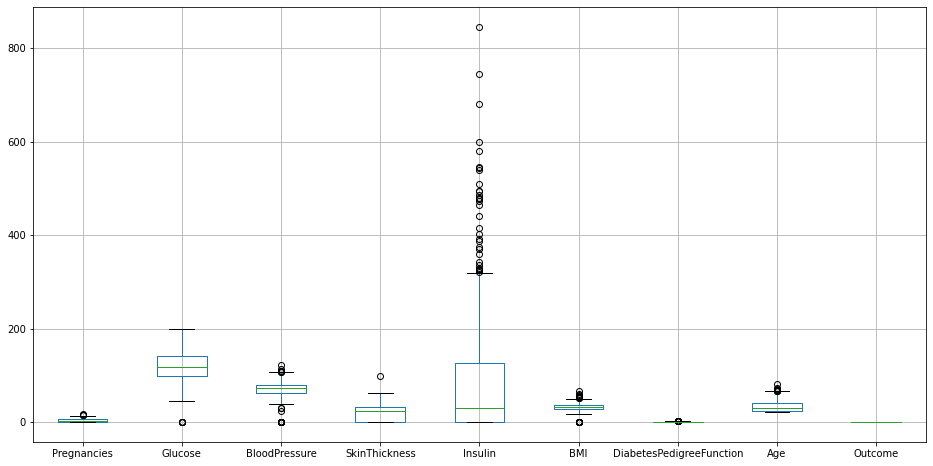

In [6]:
plt.figure(figsize=(16,8))
df.boxplot()
plt.show()

d:\User\github\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

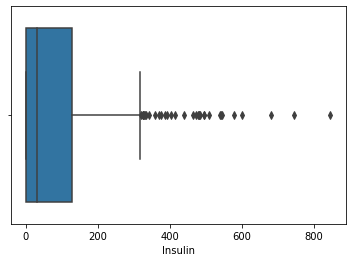

In [7]:
sns.boxplot(df['Insulin'])

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
q1 = np.percentile(df['Insulin'],25,interpolation='midpoint')
q3 = np.percentile(df['Insulin'],75,interpolation='midpoint')
iqr = q3-q1
maximum = q3 + 1.5*iqr
df = df[df['Insulin']<=maximum]    

C:\Users\Gopal Kholade\AppData\Local\Temp\ipykernel_1504\2152514033.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(df['Insulin'],25,interpolation='midpoint')
C:\Users\Gopal Kholade\AppData\Local\Temp\ipykernel_1504\2152514033.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q3 = np.percentile(df['Insulin'],75,interpolation='midpoint')


In [11]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

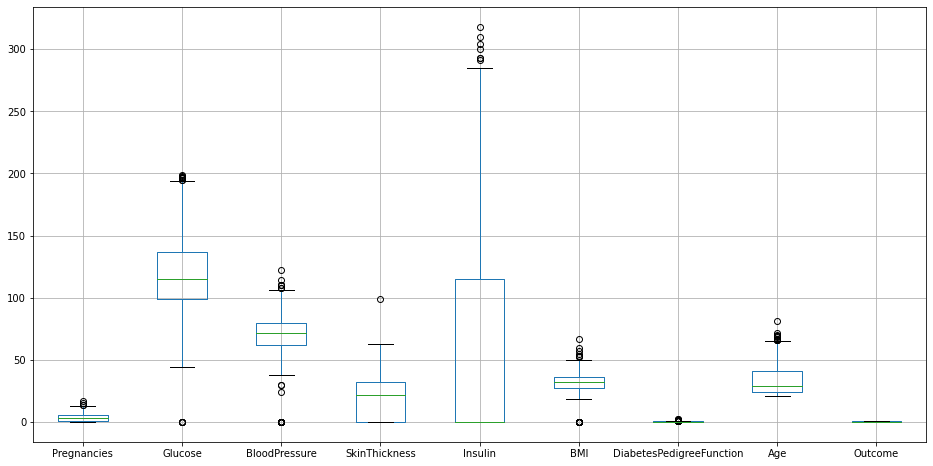

In [12]:
plt.figure(figsize=(16,8))
df.boxplot()
plt.show()

In [13]:
x=df.loc[:,df.columns!='Outcome']
y=df['Outcome']

In [14]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_st=st.fit_transform(x)
x_st

array([[ 0.63831459,  0.92230173,  0.15354684, ...,  0.22061072,
         0.49738548,  1.43631516],
       [-0.84060873, -1.09401241, -0.15257371, ..., -0.66389796,
        -0.36016635, -0.18666744],
       [ 1.22988392,  2.04247626, -0.25461389, ..., -1.08088062,
         0.63720371, -0.1012473 ],
       ...,
       [ 0.34252992,  0.0581671 ,  0.15354684, ..., -0.71444131,
        -0.68951596, -0.27208757],
       [-0.84060873,  0.21819203, -0.45869426, ..., -0.22164362,
        -0.36638049,  1.18005475],
       [-0.84060873, -0.83797252,  0.05150666, ..., -0.18373611,
        -0.47202093, -0.87002853]])

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [17]:
rf=RandomForestClassifier(n_estimators=500,random_state=0)
dt=DecisionTreeClassifier()

In [18]:
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred=rf.predict(x_test)
Y_pred=dt.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score
ac_rf=accuracy_score(y_pred,y_test)
ac_dt=accuracy_score(Y_pred,y_test)

In [22]:
print('Accuracy Score for Random forest:',ac_rf*100)
print('Accuracy Score for Decision Tree:',ac_dt*100)

Accuracy Score for Random forest: 77.55102040816327
Accuracy Score for Decision Tree: 69.38775510204081


### Here for Random Forest we got an accuracy score of about 77.55% and for Decision Tree we got an accuracy score of about 69.38%